# 线性回归_梯度下降+正则方程
## 11190307 李尧

### import+读入数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = np.load("lrdata.npy")

from numpy.linalg import inv  # 矩阵求逆
from numpy import dot  # 矩阵点乘
from numpy import mat  # 二维矩阵


## 正则方程法
### 利用矩阵计算


$$\theta = (X^TX)^{-1}X^Ty$$

#### 处理数据

In [2]:
X1 = mat(data[:,0:2]).reshape(60,2)  # x为1,2,3
Y1 = mat(data[:,2]).reshape(60,1)  # y为5,10,15
_num_of_samples = X1.shape[0]
# 在data_x的最左侧拼接全1列
X_0 = np.ones([_num_of_samples, 1])
nX = np.column_stack((X_0, X1))

#### 直接套公式进行计算

In [3]:
theta = dot(dot(inv(dot(nX.T, nX)), nX.T), Y1)  # 公式
print(theta)
print("y = %.3f X_1 %.3f X_2 + %.3f" %(float(theta[1]),float(theta[2]),float(theta[0])))


[[ 5.08336756]
 [ 3.67462399]
 [-2.49115583]]
y = 3.675 X_1 -2.491 X_2 + 5.083


## 梯度下降法

#### 处理数据

In [ ]:
X = data[:,:-1]
Y = data[:,-1:]
x1 = X[:,0]
x2 = X[:,1]
X.shape, Y.shape, X[:5], Y[:5]
plt.scatter(x1, Y)
plt.scatter(x2, Y)
plt.show()

#### Initalize

In [5]:
theta0 = 0
theta1 = 0
theta2 = 0
epochs = 10000
alpha = 0.00015

def initalize():
    global theta0, theta1, theta2
    theta0 = 0
    theta1 = 0
    theta2 = 0

    epochs = 10000
    alpha = 0.00015

#### 损失函数
$$COST = \frac{1}{N}\sum^{N}_{i=0}(Y^{'}-Y)^2$$

In [6]:
def cost(X,Y,theta0,theta1,theta2):
    loss = 0
    N = len(Y)
    for i in range(N):
        loss += (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])**2
    loss = loss/N
    return loss

#### 梯度下降函数

##### BGD

In [7]:
def grad_des_bgd(X,Y,theta0,theta1,theta2,alpha,epochs):
    m = len(Y)
    for _ in range(epochs):
        dB = 0
        dw1 = 0
        dw2 = 0
        for i in range(m):
            b_grad = (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])
            w1_grad = (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])*X[i,0]
            w2_grad = (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])*X[i,1]
            dB += b_grad
            dw1 += w1_grad
            dw2 += w2_grad
        theta0 = theta0 - alpha*dB*2/m
        theta1 = theta1 - alpha*dw1*2/m
        theta2 = theta2 - alpha*dw2*2/m
    return theta0,theta1,theta2

##### SGD

In [8]:
def grad_des_sgd(X,Y,theta0,theta1,theta2,alpha,epochs):
    m = len(Y)
    for _ in range(epochs):
        dB = 0
        dw1 = 0
        dw2 = 0
        for i in range(m):
            b_grad = (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])
            w1_grad = (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])*X[i,0]
            w2_grad = (theta0+theta1*X[i,0]+theta2*X[i,1]-Y[i])*X[i,1]
            theta0 = theta0 - alpha*b_grad*2/m
            theta1 = theta1 - alpha*w1_grad*2/m
            theta2 = theta2 - alpha*w2_grad*2/m
    return theta0,theta1,theta2

#### MAIN

##### SGD

b=0,theta1=0,theta2=0,loss=[15513.47303873]
[0]: loss = [11.10980244]
[1]: loss = [10.20101448]
[2]: loss = [9.80685781]
[3]: loss = [9.63457115]
[4]: loss = [9.55840582]
[5]: loss = [9.5241862]
[6]: loss = [9.50846602]
[7]: loss = [9.50102941]
[8]: loss = [9.49738091]
[9]: loss = [9.4955139]
b=[4.98694651],theta1=[3.68028311],theta2=[-2.4864659],loss=[9.4955139]
y = 3.680 X_1 -2.486 X_2 + 4.987


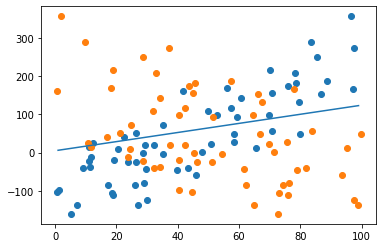

In [9]:
initalize()
    
loss = cost(X,Y,theta0,theta1,theta2)
print('b={},theta1={},theta2={},loss={}'.format(theta0,theta1,theta2,loss))
for i in range(10):
    theta0,theta1,theta2 = grad_des_sgd(X,Y,theta0,theta1,theta2,alpha,epochs)
    loss = cost(X,Y,theta0,theta1,theta2)
    print("[{}]: loss = {}".format(i, loss))
print('b={},theta1={},theta2={},loss={}'.format(theta0,theta1,theta2,cost(X,Y,theta0,theta1,theta2)))
print("y = %.3f X_1 %.3f X_2 + %.3f" %(float(theta1),float(theta2),float(theta0)))
plt.scatter(x1, Y)
plt.scatter(x2, Y)
plt.plot(np.arange(1,100), np.arange(1,100)*float(theta[2])+np.arange(1,100)*float(theta1)+float(theta0))
plt.show()

##### BGD

In [ ]:
initalize()

loss = cost(X,Y,theta0,theta1,theta2)
print('b={},theta1={},theta2={},loss={}'.format(theta0,theta1,theta2,loss))
for i in range(10):
    theta0,theta1,theta2 = grad_des_sgd(X,Y,theta0,theta1,theta2,alpha,epochs)
    loss = cost(X,Y,theta0,theta1,theta2)
    print("[{}]: loss = {}".format(i, loss))
print('b={},theta1={},theta2={},loss={}'.format(theta0,theta1,theta2,cost(X,Y,theta0,theta1,theta2)))
print("y = %.3f X_1 %.3f X_2 + %.3f" %(float(theta1),float(theta2),float(theta0)))
plt.scatter(x1, Y)
plt.scatter(x2, Y)
plt.plot(np.arange(1,100), np.arange(1,100)*float(theta[2])+np.arange(1,100)*float(theta1)+float(theta0))
plt.show()

b=0,theta1=0,theta2=0,loss=[15513.47303873]
[0]: loss = [11.10980244]
[1]: loss = [10.20101448]
[2]: loss = [9.80685781]
[3]: loss = [9.63457115]
[4]: loss = [9.55840582]
[5]: loss = [9.5241862]
[6]: loss = [9.50846602]
[7]: loss = [9.50102941]
